In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

import pandas as pd
import numpy as np
import random

# Define subjects
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Biología', 'Física', 'Química', 'Inglés']

# Generate random data
num_students = 100
nombres = ['Nombre' + str(i) for i in range(num_students)]  # Replace with actual names if available
apellidos = ['Apellido' + str(i) for i in range(num_students)] # Replace with actual names if available
dni = [random.randint(10000000, 50000000) for _ in range(num_students)]
data = []
for i in range(num_students):
    for materia in materias:
        notas = [random.randint(1, 10) for _ in range(3)] # 3 grades for 3 trimesters
        faltas = random.randint(0, 20) # Random absences
        data.append([nombres[i], apellidos[i], dni[i], materia, notas[0], notas[1], notas[2], faltas])

# Create DataFrame
columnas = ['Nombre', 'Apellido', 'DNI', 'Materia', '1er Trimestre', '2do Trimestre', '3er Trimestre', 'Faltas']
df = pd.DataFrame(data, columns=columnas)

# Display the DataFrame
df.head()

,Nombre,Apellido,DNI,Materia,1er Trimestre,2do Trimestre,3er Trimestre,Faltas
0,Nombre0,Apellido0,27779658,Matemática,3,1,3,18
1,Nombre0,Apellido0,27779658,Lengua y Literatura,8,7,1,9
2,Nombre0,Apellido0,27779658,Historia,7,6,6,10
3,Nombre0,Apellido0,27779658,Geografía,6,5,4,11
4,Nombre0,Apellido0,27779658,Biología,3,4,5,2


<ipython-input-19-ea975b73e03d>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(materias_promedio.index, rotation=45, ha='right')


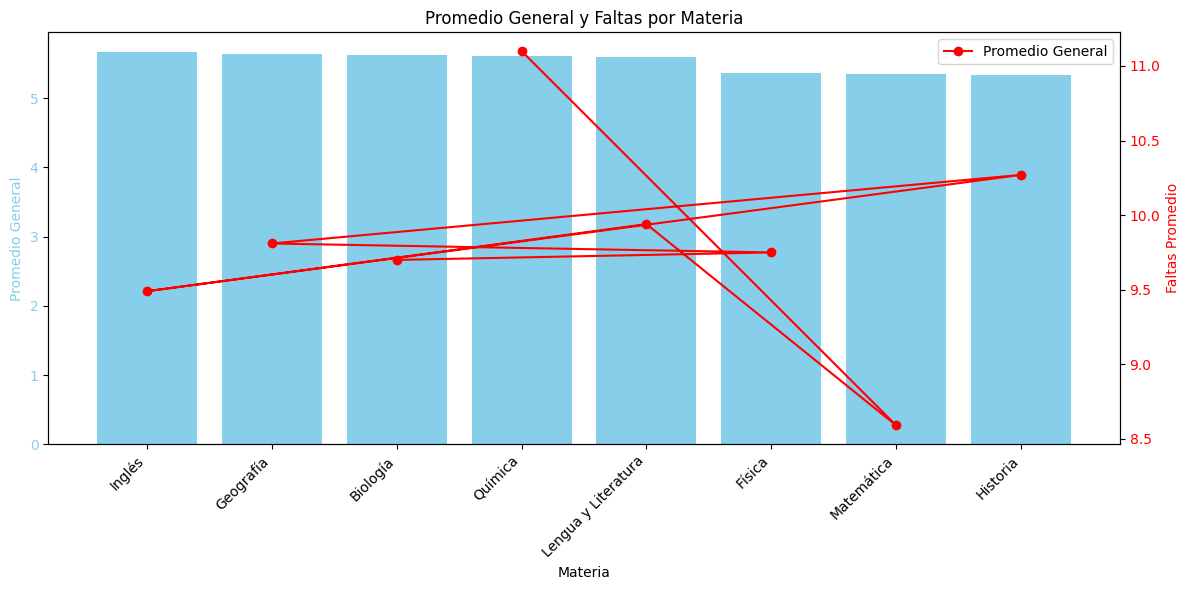

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Calculate average grade for each subject
materias_promedio = df.groupby('Materia')[['1er Trimestre', '2do Trimestre', '3er Trimestre']].mean().mean(axis=1)
materias_promedio = materias_promedio.sort_values(ascending=False)

# Calculate average absences for each subject
faltas_promedio = df.groupby('Materia')['Faltas'].mean()

# Create bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average grades
ax1.bar(materias_promedio.index, materias_promedio.values, color='skyblue')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params('y', labelcolor='skyblue')
ax1.set_xticklabels(materias_promedio.index, rotation=45, ha='right')

# Secondary axis for absences
ax2 = ax1.twinx()
ax2.plot(faltas_promedio.index, faltas_promedio.values, color='red', marker='o')
ax2.set_ylabel('Faltas Promedio', color='red')
ax2.tick_params('y', labelcolor='red')

# Add title and legend
plt.title('Promedio General y Faltas por Materia')
plt.legend(['Promedio General', 'Faltas Promedio'], loc='upper right')

# Display the chart
plt.tight_layout()
plt.show()